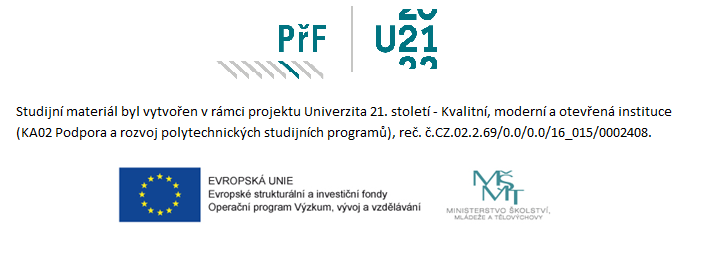

# Neuronové sítě

Neuronové sítě jsou moderní metodou strojového učení. V současnosti existuje celá řada modelů a seznámení se s každým z nich je naprosto mimo rámec tohoto materiálu. Ukážeme si jen některé modely a zaměříme se spíše na aplikační rámec.


## Vícevrstvý perceptron - MLP
MLP (Multi layer perceptron) je rozšířením modelu perceptronu v **sheetu lineární klasifikátory**. Na obrázku níže, je jednoduchý model, který má vstupní vrstvu, což je opět vektor hodnot $x$, dále má dvě skryté vrstvy a vrstvu výstupní, která je tvořena jednou výstupní buňkou, tedy výstupem je jedna skalární hodnota $\hat{y}$.

V současnosti se též hodně používá pojem *Deep Learning*, čímž se myslí takové sítě, které mají velký počet skrytých vrstev.


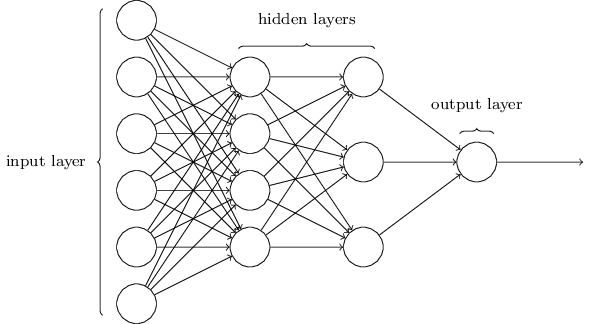

Zdroj obrázku [https://github.com/d-r-e/multilayer-perceptron](https://github.com/d-r-e/multilayer-perceptron)

### Matematický model

V sekci věnované perceptronu a logistické regresi jsme viděli, že každý takový perceptron má nějakou aktivační funkci, např. *sigmoidu* nebo i další. Předpokládejme tedy, že máme nějakou takovou aktivační funkci a je pro všechny buňky v dané vrstvě stejná, což je obvyklé. Dále ale můžeme používat v různých vrstvách různé aktivační funkce. Protože máme dvě skryté vrstvy, tak si označme $f^{1}_{i}(\,.)$ aktivační funkci v první vrstvě na *i-té* buňce a $f^{2}_{i}(\,.)$ na buňkách na vrstvě druhé.

Váhy mezi vstupní vrstvou a první skrytou vrstvou je možné reprezentovat maticí $W^1$ a to tak, že *i-tý* řádek matice představuje váhy (včetně biasu $b$) k *i-té* buňce. Tedy například pro první buňku první vrstvy máme následující skalární součin $W^1_{1} \cdot x$ (horní index vrstva, spodní index buňka), který vstoupí do této buňky a na výstup této buňky je produkován výstup aktivační funkce $f^{1}_{1}(W^1_{1} \cdot x)$. Protože uvažujeme, že aktivační funkce jsou napříč danou vrstvou stejné, tak zanedbáme spodní indexy příslušející jednotlivým buňkám a budeme chápat operaci vektorizovaně, tedy rovnice
\begin{equation}
x'=f^{1}(W^1 \cdot x),
\end{equation}
představuje vektor hodnot, který produkuje na vstup $x$ při daných vahách $W^1$ první skrytá vrstva. Tento vektor $x'$ je ovšem vstupem do druhé vrstvy, kde je situace analogická, tedy
\begin{equation}
x''=f^{2}(W^2 \cdot x').
\end{equation}
A toto celé s vahami $W^{o}$ vstupuje do výstupní buňky, kde je aktivační funkce $f^{o}$, dostáváme tak následující silně nelineární funkci:
\begin{equation}
\hat{y}(x)=f^{o}(W^{o} \cdot f^{2}(W^2 \cdot f^{1}(W^1 \cdot x))).
\end{equation}

Opět předpokládáme nějakou vhodnou ztrátovou funkci, např. křížovou entropii (*cross entropy*) pro klasifikaci
\begin{equation}
J(W^1,W^2, W^o )=-\frac{1}{\#X}\sum_i (y_i\log(\hat{y}_i)-(1-y_i)\log(1-\hat{y}_i)),
\end{equation}
kde $\#X$ představuje počet příkladů v učební (trénovací) množině a opět sčítáme přes celý učební dataset. Tuto funkci chceme minimalizovat.

**Poznámka**

Z formulace je jasné, že použití velkého počtu vrstev a buněk v nich vede k velkému počtu vah $W$, které musíme nastavit při učení sítě. Je častou chybou, že se začnou konstruovat velmi hluboké sítě s velkým počtem buněk, kdy zároveň máme málo (vágní definice) dat. Síť pak poměrně často špatně generalizuje, chová se jako paměť.



#### Úkol pro samostatnou činnost
Rozmyslete si, kolik bude potřeba určit vah včetně biasu pro výše zobrazený model neuronové sítě.






### Učení MLP

Pro minimalizaci ztrátové funkce je použita některá z variant gradientní metody, viz **sheet lineární klasifikátory**. Zde je klíčové to, že je nevýhodné díky velkému počtu vah vyjadřovat gradient pomocí numerické derivace. Pro jeho výpočet se využívá toho, že daná ztrátová funkce je v podstatě složená funkce a proto můžeme použít pravidlo o derivaci složené funkce, tzv. [řetízkové pravidlo](https://math.fel.cvut.cz/mt/txtc/1/txc3ca1d.htm) (*chain rule*). Pro ilustraci uvažujme jednoduchý model na obrázku níže.

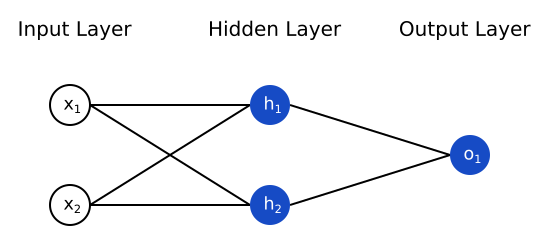

Zdroj obrázku [https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9](https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9).

Predikce modelu za použití předchozího značení je dána:
\begin{equation}
\hat{y}(x)  = f^{o}(W^2 \cdot f^{1}(W^1 \cdot x)).
\end{equation}
Uvědomme si, že aktivační funkce $f^0(u)$ je ve skutečnosti funkcí jedné proměnné $u=W^2 \cdot f^{1}(W^1 \cdot x)$ a aktivační funkce $f^{1}(v)$ je funkcí proměnné $v=W^1 \cdot x$.

Pro derivaci dle $W^2$(formálně, derivaci dle matice jsme neprobírali) platí:
\begin{equation}
\frac{d \hat{y}}{d W^2} = \frac{df^{o}(u)}{du}\frac{du}{dW^2}=\frac{df^{o}(u)}{du}f^1(v),
\end{equation}
a podobně pro derivaci dle $W^1$ platí
\begin{equation}
\frac{d \hat{y}}{d W^1} = \frac{df^{o}(u)}{du}\frac{du}{d W^1}=\frac{df^{o}(u)}{du}W^2\frac{df^1(v)}{dv}\frac{dv}{d W^1}=\frac{df^{o}(u)}{du}W^2\frac{df^1(v)}{dv}x.
\end{equation}
Z předchozího textu je vidět, že **obě derivace sdílejí první člen**, čehož budeme v dalším využívat.


####Trocha matematiky
Pro jednoduchost v dalším uvažujme ztrátovou funkci ve smyslu MNČ:
\begin{equation}
J(W^{1},W^{2})=\frac{1}{\#X}\sum_i(y_i-\hat{y}_i)^2,
\end{equation}
kde $\#X$ představuje počet příkladů v učební (trénovací) množině a opět sčítáme přes celý učební dataset.


Rozepíšeme-li si vektorovou rovnici modelu po složkách, dostáváme:
\begin{equation}
\hat{y}(x) = f^{o}(w^{2}_{1} f^{1}_{1}(w^{1}_{1,1} x_{1}+w^{1}_{1,2} x_{2} + b^{1}_{1})  + w^{2}_{2} f^{1}_{2}(w^{1}_{2, 1} x_{1}+w^{1}_{2, 2} x_{2} + b^{1}_{2}) + b^{2}),
\end{equation}
kde $f^{o}(u)$ je funkce jedné proměnné a proměnná $u$ představuje vnitřní výraz $u=w^{2}_{1} f^{1}_{1}(w^{1}_{1,1} x_{1}+w^{1}_{1,2} x_{2} + b^{1}_{1})  + w^{2}_{2} f^{1}_{2}(w^{1}_{2, 1} x_{1}+w^{1}_{2, 2} x_{2} + b^{1}_{2}) + b^{2}$. Podobně u funkcí $f^{1}$, resp. $f^{2}$ je argument funkce jedné proměnné, např. $v^1$ u $f^{1}$, resp. $v^2$ u $f^{2}$.




Pro výpočet gradientu $\nabla_{w}J$ potřebujeme jednotlivé parciální derivace, použítím řetízkového pravidla tedy pro $w^2_{1}$ dostáváme:
\begin{align}
\frac{\partial J}{\partial w^2_{1}}  & = \frac{1}{\#X}\sum_i2(y_i-\hat{y}_i) \frac{\partial \hat{y}}{\partial w^2_{1}}  \\
& = \frac{1}{\#X}\sum_i2(y_i-\hat{y}_i)\frac{d f^{o} (u)}{d u}\frac{\partial u}{\partial w^2_{1}}\\
&=\frac{1}{\#X}\sum_i2(y_i-\hat{y}_i)\frac{d f^{o} (u)}{d u}
f^{1}_{1}(w^{1}_{1,1} x_{1}+w^{1}_{1,2} x_{2} + b^{1}_{1})
\end{align}
a podobně pro
\begin{align}
\frac{\partial J}{\partial w^1_{1,1}}  & = \frac{1}{\#X}\sum_i2(y_i-\hat{y}_i) \frac{\partial \hat{y}}{\partial w^1_{1,1}}  \\
& = \frac{1}{\#X}\sum_i2(y_i-\hat{y}_i)\frac{d f^{o} (u)}{d u}\frac{\partial u}{\partial w^1_{1,1}}\\
&=\frac{1}{\#X}\sum_i2(y_i-\hat{y}_i)\frac{d f^{o} (u)}{d u} (w^{2}_{1} \frac{d f^1_1}{d v^{1} }\frac{\partial v^1}{\partial w^1_{1,1}}+w^{2}_{2} \frac{d f^{1}_2}{d v^{2} }\frac{\partial v^2}{\partial w^1_{1,1}})\\
&=\frac{1}{\#X}\sum_i2(y_i-\hat{y}_i)\frac{d f^{o} (u)}{d u} (w^{2}_{1} \frac{d f^{1}{1}}{d v^{1} }x_1+w^{2}_{2} \frac{d f^{1}_2}{d v^{2} }0).
\end{align}

Zde je klíčové, že pro váhy na nižších vrstvách (prvky $W^1$) jsme schopni používat části výrazu, zde $\frac{1}{\#X}\sum_i2(y_i-\hat{y}_i)\frac{d f^{o} (u)}{d u}$, které jsou společné i s vrstvou vyšší ($W^{2}$). V případě hlubších sítí, by zde byla větší **část společná**.   

Algoritmus *backpropagation* (zpětného šíření) toho využívá a postupuje při výpočtu gradientu od vyšších vrstev k vrstvám nižším a využívá společných částí výpočtů. Poznamenejme, že derivaci (nikoliv parciální) daných aktivačních funkcí též umíme spočítat, neboť pro ně máme vzorec, viz např. derivace *sigmoidy* v **sheetu lineární klasifikátory**.

Názorně je algoritmus zpětného šíření rozebrán [zde](https://deepai.org/machine-learning-glossary-and-terms/backpropagation) a [zde](https://neptune.ai/blog/backpropagation-algorithm-in-neural-networks-guide). Hlouběji, včetně některých výpočetních detailů, [zde](https://www.deeplearningbook.org/contents/mlp.html).

## Některé další detaily

Pro každý typ úlohy, binární klasifikace, klasifikace do více tříd, regrese se používají různé aktivační funkce a různé ztrátové funkce.

### Aktivační funkce
U aktivačních funkcí rozlišujeme pro jakou úlohu  a v jaké části neuronové sítě se používá. Protože síť je obvykle učená nějakou z variant gradientní metody a pro výpočet gradientu je použit algoritmus backpropagation, hrozí při volbě některých aktivačních funkcí riziko, že bude vracet nulovou derivaci, tzv. [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

Nejjednodušší aktivační funkce je *lineární*
$f(z)=az$, v případě užití lineární funkce je potřeba dát pozor na to, aby všechny vrstvy neměli jako aktivační funkci lineární funkci, neboť pak je celý model lineární a nemá cenu přidávat další vrstvy. Uvažujme $f^o(u)=au$ a $f^1(v)=bv$ a předchozí model s jednou skrytou vrstvou pak dostáváme:
\begin{align}
\hat{y}(x)  = f^{o}(W^2 \cdot f^{1}(W^1 \cdot x))=a(W^2 \cdot b(W^1 \cdot x)))=ab(W^2 \cdot W^1 \cdot x))=abW \cdot x,
\end{align}
což je lineární funkce.
Lineární funkce se často využívají na výstupní vrstvě pro model regrese.

Rozšířením lineární funkce je *ReLU* (Rectified Linear Unit) , $f(z)=\max(0,z)$, která se používá ve skrytých vrstvách. Zde je jisté riziko, že při náhodné inicializaci vah může být pro všechny vzory výstupem této funkce vždy nula a tedy i spočtený gradient je nulový. Toto odstraňuje její varianta *LeakyReLU*, která má pro záporný argument velmi malou směrnici:
\begin{equation}
f(z) =
\left\{
    \begin{array}{lr}
        z, & \text{když } z > 0 \\
        0.01z, & \text{jinak}
    \end{array}
\right\}.
\end{equation}

Další typy aktivačních funkcí jsou sigmoida $f(z) = \frac{1}{1+e^{-z}}$ a *hyperbolický tangens* (*tanh*), $f(z)=\frac{e^z-e^{-z}}{e^{z}+e^{-z}}$. Obě tyto funkce je možné použít ve skrytých vrstvách a sigmoidu samozřejmě i jako výstupní. Šel by použít i $tanh$, ale musí se vzít potaz, že vrací čísla v intervalu $(-1,1)$. Obě aktivační funkce mohou vykazovat vymizení gradientu, protože mají oblasti, kdy jsou téměř konstantní.

Pro úlohu klasifikace do více tříd se ve výstupní vrstvě využívá tzv. *softmax* funkce. Vstupem do této funkce je vektor a výstupem je též vektor, jehož složky mají význam pravděpodobnosti příslušnosti do daných tříd s tím, že jako danou třídu bereme tu, která má největší pravděpodobnost. Softmax je definována:
\begin{equation}
f(z)_i = \frac{e^{z_i}}{\sum_i e^{z_i}},
\end{equation}
kde sčítáme přes všechny složky vektoru.
Na obrázku níže je schematicky zakresleno použití této funkce.

Přehled, kdy a kterou funkci využít, lze nalézt [zde](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/) a přehled různých aktivačních funkcí, včetně výhod a nevýhod, je uveden [zde](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html).


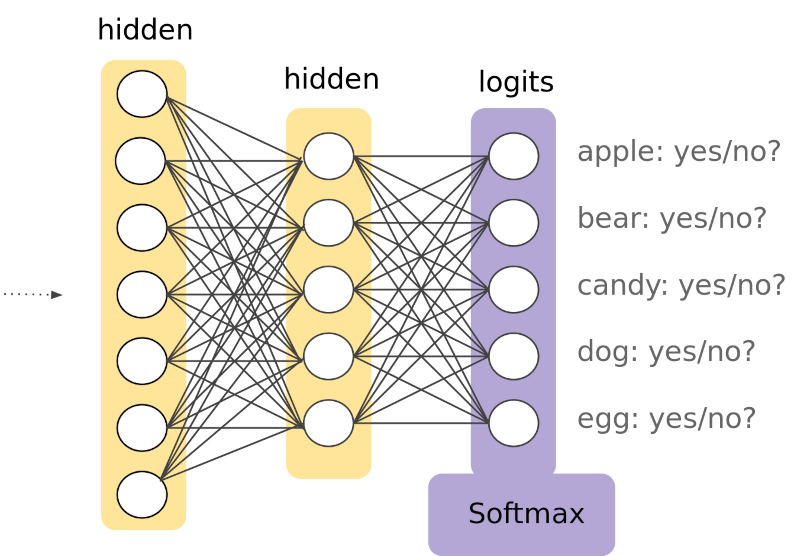


Zdroj obrázku [https://xeonqq.github.io/machine%20learning/softmax/](https://xeonqq.github.io/machine%20learning/softmax/)

### Ztrátové funkce

Pro klasifikaci je často používaná křížová entropie. Binární křížovou entropii jsme již viděli v části věnované lineárním klasifikátorům:
\begin{equation}
J(w)=-\frac{1}{\#X}\sum_i (y_i\log(\hat{y}_i)-(1-y_i)\log(1-\hat{y}_i)),
\end{equation}
kde definujeme $0\log(0)=0$, tj. v limitním smyslu.

Pro klasifikaci do více tříd nejprve definujeme křížovou entropii:
\begin{equation}
H(y, \hat{y}) = -\sum_j (y_j\log(\hat{y}_{j}(x)),
\end{equation}
kde $y$ je vektor pravděpodobností k daným třídám a $\hat{y}$ je odhad modelu, index $j$ zde značí složky daných vektorů. Nyní definujeme ztrátovou funkci za celý dataset:
\begin{equation}
J(w)=\frac{1}{\#X}\sum_i H(y_i, \hat{y}(x_i)),
\end{equation}
kde index $i$ je použit pro *i-tý* příklad z datasetu a jeho label.

Pro regresní úlohy se často používá formulace chyby ve smyslu nejmenších čtverců *MSE* (*Mean Squared Error*):
\begin{equation}
J(w)=\frac{1}{\#X}\sum_i(y_i-\hat{y}_i)^2,
\end{equation}
případně *RMSE* (*Root Mean Squared Error*):
\begin{equation}
J(w)=\sqrt{\frac{1}{\#X}\sum_i(y_i-\hat{y}_i)^2},
\end{equation}
nebo ve smyslu *MAE* (*Mean Absolute Error*):
\begin{equation}
J(w)=\frac{1}{\#X}\sum_i |y_i-\hat{y}_i|.
\end{equation}

Poněkud komplikovanější myšlenka se skrývá v tzv. *Huber loss* funkci, která je navržena tak, aby se pro hodnoty argumentu větší než předepsaná hodnota chovala lineárně. Toto je výhodné pokud v datasetu existují tzv. *outlayers*, tedy odlehlé hodnoty, netypické příklady, které model hůře klasifikuje, tak jim při učení neuronové sítě dává menší váhu než v případě *MSE*. Funkci je možné definovat [viz zde](https://en.wikipedia.org/wiki/Huber_loss):

\begin{equation}
L_{\delta}(y, \hat{y}) =
\left\{
    \begin{array}{lr}
        \frac{(y-\hat{y})^2}{2}, & \text{když } |y-\hat{y}| \le 0 \\
        \delta(|y-\hat{y}|-\frac{\delta}{2}), & \text{jinak}
    \end{array}
\right\}.
\end{equation}
Na ukázce níže je tato funkce zakreslena, vyzkoušejte vliv $\delta$ na tvar funkce. Výslednou chybu získáme vysčítáním přes celý dataset, podobně jako v případě křížové entropie výše.

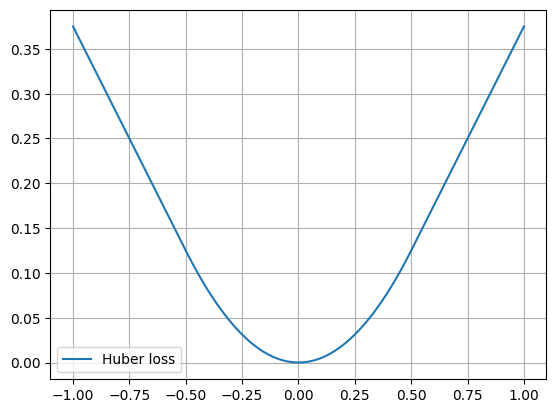

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

def huber(x, delta):
  av = math.fabs(x)
  if av <= delta:
    return x**2/2
  else:
    return delta*(av-delta/2)
# hodnota delta
delta = 0.5
x = np.linspace(-1,1,100)
y = np. array([ huber(point, delta) for point in x ])
plt.plot(x,y, label='Huber loss')
plt.legend()
plt.grid()


**Poznámka**
Ve výše uvedených příkladech ztrátových (loss) funkcí dochází vždy ke sčítání přes celý tréninkový dataset. Obvykle se vezme jen část datasetu, tzv. *dávka* (*minibatch*) a udělá se krok danou optimalizační metodou, pak se vezme další krok a pak další. Schématicky je to zachyceno na obrázku níže. Když se projede celý dataset, tak mluvíme o *epoše učení*. Velikost dávky má vliv na rychlost a konvergenci učení, obvykle je to nutno vyexperimentovat. Toto bývá často nazýváno *SGD* (*Stochastic Gradient Descent*) viz [zde](https://en.wikipedia.org/wiki/Stochastic_gradient_descent). Někdy se jako *SGD* rozumí situace, kdy velikost dávky je jen jeden vzor.


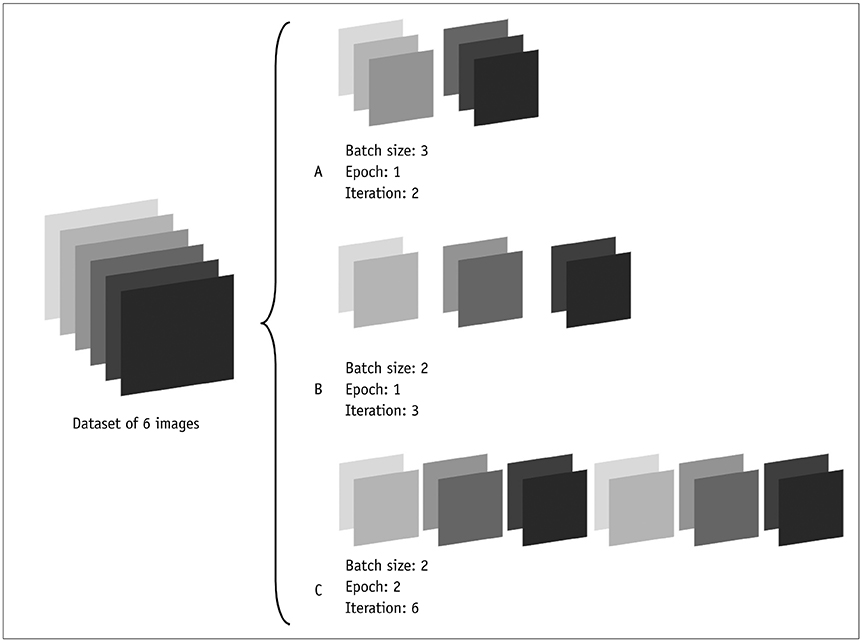

Zdroj obrázku https://www.kjronline.org/ArticleImage/0068KJR/kjr-21-33-g008-l.jpg

# Ukázkové úlohy

Pro praktickou implementaci použití neuronových sítí budeme používat framework [TensorFlow](https://www.tensorflow.org/) v kombinaci s nadstavbou [Keras](https://keras.io/). K obojímu na daných odkazech existují bohaté tutoriály.

### Klasifikace ručně psaných číslic - MNIST

Nejprve si ukážeme klasiku pro klasifikační úlohy. Klasifikace ručně psaných číslic na datasetu [MNIST](https://en.wikipedia.org/wiki/MNIST_database). Tento dataset je i součástí Tensorflow. Jednotlivé kroky sestrojení modelu budeme komentovat.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Nejprve jsme si naimportovali potřebné knihovny a v následující buňce načteme dataset. Dataset je již zamíchaný a rozdělený na trénovací a testovací dataset. Vidíme zde, jaké jsou rozměry trénovacího a testovacího datasetu a také to, že číslice jsou ve formě matic o rozměru *28x28* pixelů.

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


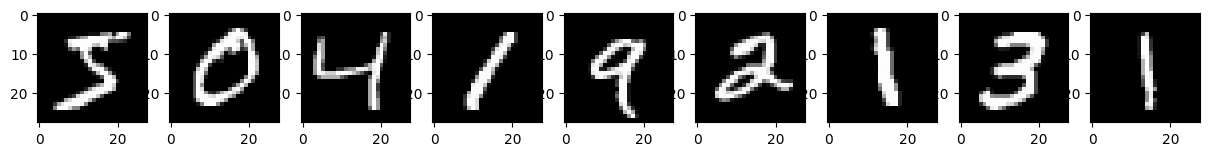

In [2]:
train_data, test_data = tf.keras.datasets.mnist.load_data()
X_tr,y_tr = train_data
X_test,y_test = test_data
print(f'{X_tr.shape}')
print(f'{y_tr.shape}')
print(f'{X_test.shape}')
print(f'{y_test.shape}')
fig, axs = plt.subplots(1, 9, figsize=(15, 3))
for index, ax in enumerate(axs):
  ax.imshow(X_tr[index],cmap='gray')
plt.show()

V další buňce je provedena příprava dat na použití neuronové sítě. Nejprve jsme si udělali proměnnou, která určuje kolik je daných kategorií, máme totiž číslice 0 až 9. Dále si obrázky znormalizujeme. Protože se jedná o obrázky v odstínech šedi, tak v dané matici tvořící obrázek mohou být celočíselné hodnoty z intervalu $<0,255>$. Vydělením hodnotou $255$ došlo k normalizaci, v podstatě se jedná o *minmax škálování*.

Poté rozvineme matice příslušející jednotlivým příkladům z obou datasetů do vektorů. Dimenze těchto vektorů je $28 \cdot 28=784$. A na závěr převedeme labely na kategorické proměnné, viz **sheet věnovaný přípravě dat**. Všimněte si, že i daná knihovna má tyto nástroje.

In [3]:
CATEGORIES = 10
# Normalizace <0,255> -> <0,1>
X_tr = X_tr/255.0
X_test = X_test/255.0
# Prevod matic 28*28 na vektory
X_tr_vec = X_tr.reshape(-1,28*28)
X_test_vec = X_test.reshape(-1,28*28)
print(X_tr_vec.shape)
print(X_test_vec.shape)
# prevod na kategoricke promenne
y_tr_cat = tf.keras.utils.to_categorical(y_tr, CATEGORIES)  # preved na matici vystupu [1] -> [0,1,0,0,0]
y_test_cat = tf.keras.utils.to_categorical(y_test, CATEGORIES)


(60000, 784)
(10000, 784)


V následující buňce je ukázáno vytvoření modelu *MLP*. Udělali jsme si tovární funkci, která vrací výsledný model. Použitý model neuronové sítě má dvě skryté vrstvy, každá z nich má $32$ jednotek a je v nich použita aktivační funkce *ReLU*. Výstupní vrstva má $10$ výstupů, viz proměnná *CATEGORIES*, a je v ní použita aktivační funkce funkce *Softmax*. Dále je nastavena *loss funkce*, což je křížová entropie, zde *categorical_crossentropy*, bude použita optimalizační metoda *ADAM* (Adaptive Moment Estimation), více viz princip [zde](https://www.geeksforgeeks.org/intuition-of-adam-optimizer/) a nebo [podrobněji](https://arxiv.org/abs/1412.6980). Pro učení je třeba často sledovat různé metriky. V tomto příkladu sledujeme *accuracy*, viz **úvodní sheet věnovaný klasifikaci**.

Metoda vrací model, který potom naučíme pomocí metody *fit*. Použit je předepsaný počet *epoch učení*, tj.průchodů celým datasetem. Dále je z důvodu sledování toho, jak se model učí, dáno 10% vzorků (*validation_split*) na stranu a nepoužijí se při učení. Tímto pak můžeme sledovat to, jak se model chová z hlediska sledovaných metrik na neznámých příkladech.

In [6]:
from tensorflow.keras import models, layers
def get_model():
  model = models.Sequential()
  model.add(layers.Dense(units = 32, input_shape = (784,) , activation = 'relu'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(units = 32, activation='relu'))
  model.add(layers.Dense(CATEGORIES, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


EPOCHS = 20
model = get_model()
history = model.fit(X_tr_vec, y_tr_cat, epochs=EPOCHS, validation_split=0.1)


Epoch 1/20
1688/1688 [==============================] - 9s 4ms/step - loss: 0.4427 - accuracy: 0.8694 - val_loss: 0.1744 - val_accuracy: 0.9507
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2286 - accuracy: 0.9319 - val_loss: 0.1322 - val_accuracy: 0.9627
Epoch 3/20
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1854 - accuracy: 0.9437 - val_loss: 0.1176 - val_accuracy: 0.9652
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1629 - accuracy: 0.9504 - val_loss: 0.1089 - val_accuracy: 0.9668
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1507 - accuracy: 0.9525 - val_loss: 0.1132 - val_accuracy: 0.9658
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1411 - accuracy: 0.9570 - val_loss: 0.1041 - val_accuracy: 0.9680
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1295 - accuracy: 0.9592 - val_loss: 0.1101 - val_accuracy:

Na buňce níže jsou vykresleny informace o úspěšnosti modelu z hlediska metriky *accuracy* (vlevo) a průběh optimalizace (vpravo). Na obrázku vlevo je vidět, že model mírně hůře klasifikuje data, která neviděl. Nicméně rozdíl není nikterak kritický. Pokud by byl výraznější, tak by bylo nutné model různě regularizovat, např. použitím tzv. *dropout* vrstvy, viz např. [zde](https://keras.io/api/layers/regularization_layers/dropout/). Na obrázku vpravo vidíme, že křivka ještě stále klesá, tedy má smysl přidat ještě několik epoch. Pokud by byla plochá, tak již obvykle nemá smysl  přidávat epochy učení modelu.

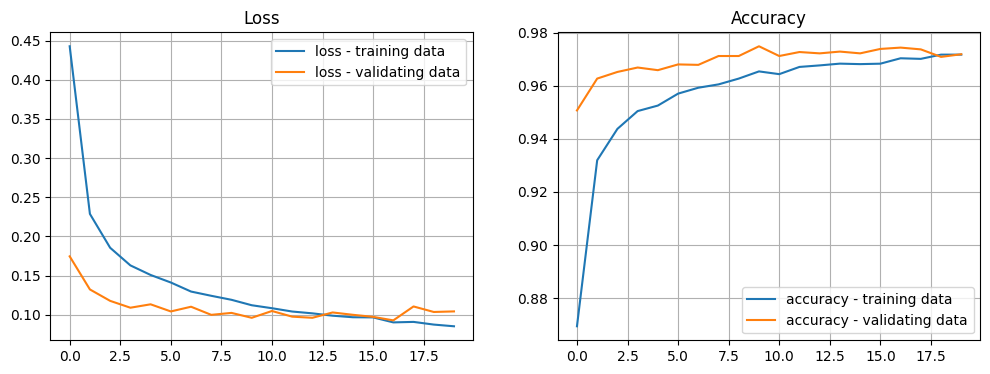

In [7]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)

axis[0].plot(history.history['loss'], label='loss - training data')
axis[0].plot(history.history['val_loss'], label='loss - validating data')
axis[0].grid()
axis[0].set_title('Loss')
axis[0].legend()



axis[1].plot(history.history['accuracy'], label='accuracy - training data')
axis[1].plot(history.history['val_accuracy'], label='accuracy - validating data')
axis[1].grid()
axis[1].set_title('Accuracy')
axis[1].legend()




V buňce níže je vypsána matice záměn mezi číslicemi na testovacíh datech, což je relevantní pro zhodnocení modelu. Všimněte si hodnoty na pátém řádku v posledním sloupci, která nám říká, že klasifikátor často zaměnil číslici 4 za 9. Obdobně můžeme zjistit i další časté záměny.
Dále je zde určena *accuracy*, která obvykle bývá nižší než na trénovacích datech.

In [ ]:
from sklearn.metrics import confusion_matrix # matice
yhat = model.predict(X_test_vec)
vysl = np.argmax(yhat,axis=1)
cm = confusion_matrix(y_test, vysl)
print(cm)
print("Ohodnoceni na testovacich datech")
results = model.evaluate(X_test_vec, y_test_cat)
print("test loss, test acc:", results)

313/313 [==============================] - 0s 1ms/step
[[ 960    0    0    1    2    1   10    2    4    0]
 [   0 1104    5    0    0    1    3    1   20    1]
 [   6    1  963    7   10    2    7    9   26    1]
 [   1    1   26  937    0    9    1   20   13    2]
 [   0    1    3    0  920    0   13    4    5   36]
 [   6    2    3   28    5  801   15    2   22    8]
 [   8    2    4    0    8   11  920    0    5    0]
 [   2   11   16    5    4    0    0  967    1   22]
 [   6    5    8    7   15   13    9    9  896    6]
 [   8    3    0   11   29    6    2   14   10  926]]
Ohodnoceni na testovacich datech
313/313 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9394
test loss, test acc: [0.22456789016723633, 0.9394000172615051]


#### Úkoly pro samostatnou práci

1.      Vyzkoušejte různé modifikace modelu jako je počet
vrstev, typ aktivační funkce, velikost minibatche (v metodě fit). Upravte generující funkci modelu tak, aby stačilo pouze zadat příslušné hyperparametry modelu. Nalezněte nejlepší model, tedy model s nejvyšší accuracy na testovacích datech.
2.      Vyzkoušejte navrhnout model pro dataset [EMNIST](https://www.nist.gov/itl/products-and-services/emnist-dataset). Použijte jeho načtení v buňce níže.

In [ ]:
!pip install emnist
from emnist import extract_training_samples
images, labels = extract_training_samples('letters')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Vylepšení modelu pomocí konvoluční vrstvy - CNN

Nyní si ukážeme použití modernějšího modelu pro zpracování obrazových dat a to konvolučních neuronových sítí ( Convolutional Neural Network). Základní kritika předchozího modelu spočívá v tom, že když rozvineme obrázky do vektorů, tak přijdeme o topologickou informaci, tj. informaci uloženou v tom, že některé pixely jsou u sebe.
Jiný pohled je takový, že pouhý jas daného pixelu je nedostačující. Pokud chceme rozpoznávat třeba zvířata, poznáváme je dle některých rysů, tj. když zmenším či zvětším obrázek kočky, tak tam pořád zůstávají charakteristické rysy kočky, např. vousy, uši, či ocas. Informace o přítomnosti těchto rysů nám zajistí tzv. konvoluční část neuronové sítě, viz obrázek níže.

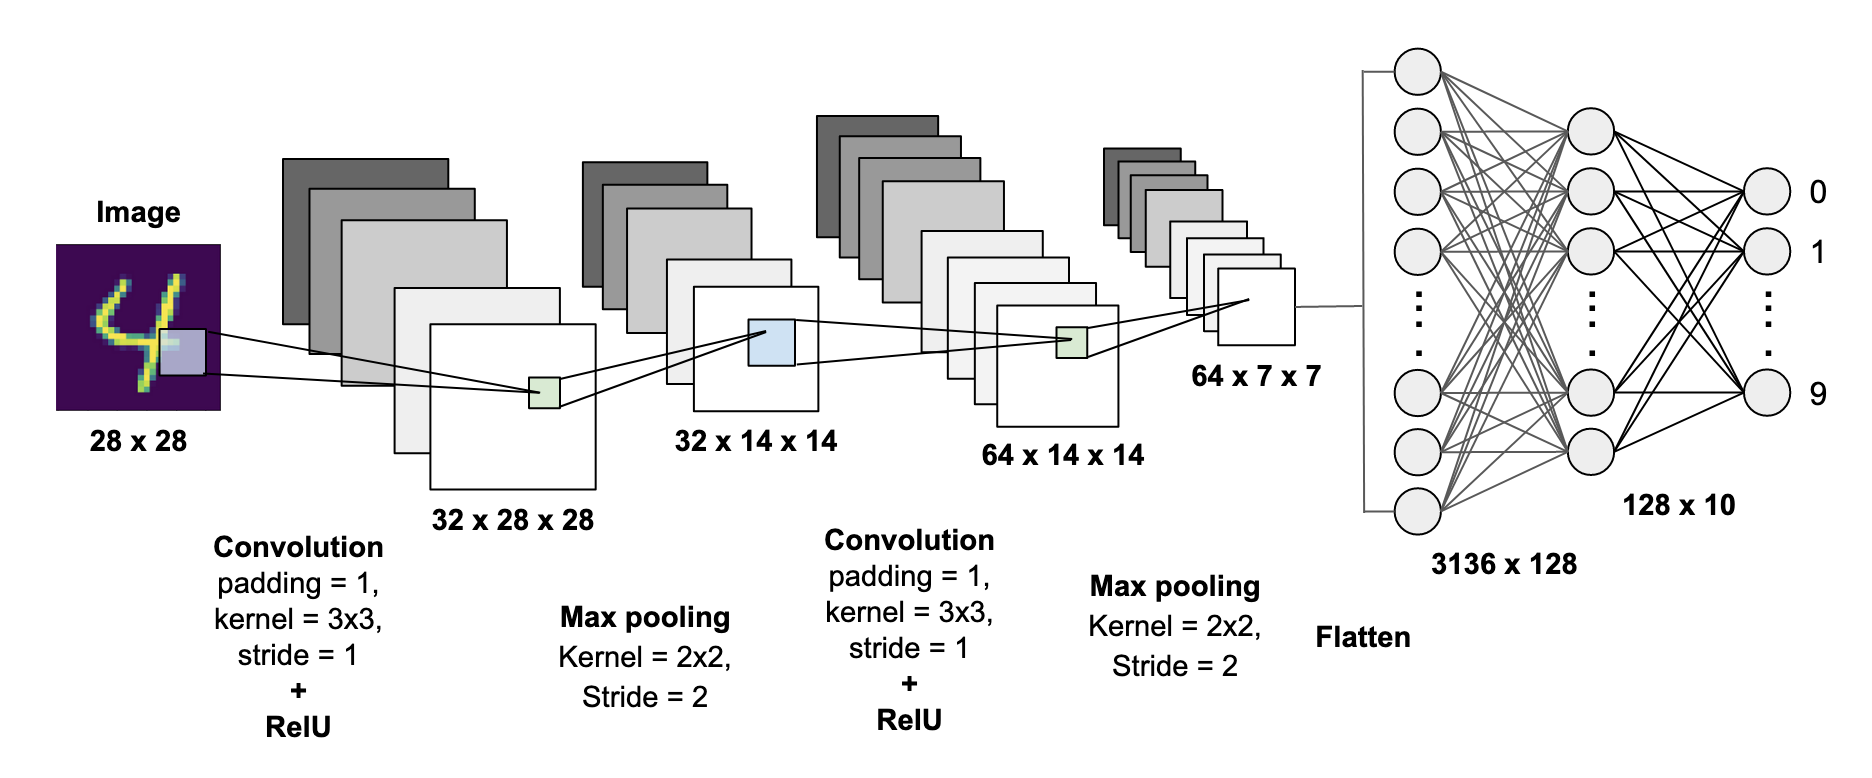

Zdroj obrázku [https://towardsdatascience.com/mnist-handwritten-digits-classification-using-a-convolutional-neural-network-cnn-af5fafbc35e9](https://towardsdatascience.com/mnist-handwritten-digits-classification-using-a-convolutional-neural-network-cnn-af5fafbc35e9(

V levé části obrázku je konvoluční část sítě, která spolu s tzv *poolováním* vyhledává dané rysy obrázku a tato část je pak napojena na klasický klasifikátor, viz předchozí příklad, který na základě přítomnosti rysů rozhoduje o tom, co je to za kategorii.

Detailní vysvětlení detailů je mimo rámec tohoto materiálu. Proto to zde pouze nastíním a dodám odkazy na další materiály.

Operace konvoluce, viz obrázek níže, posouvá po zdrojovém obrazu konvoluční okénko (*jádro*, *kernel*) a odpovídající pixely vynásobí vahami z jádra a sečte. Výsledkem této operace je jistá obrazová transformace, která je dána hodnotami jádra.


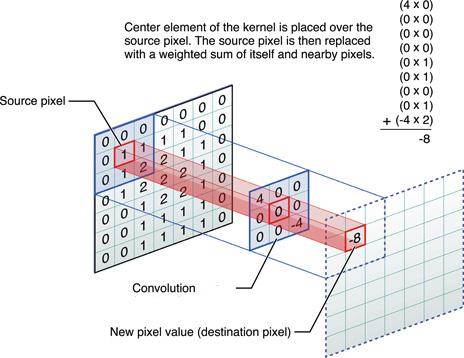

Zdroj obrázku [https://medium.com/@bdhuma/6-basic-things-to-know-about-convolution-daef5e1bc411](https://medium.com/@bdhuma/6-basic-things-to-know-about-convolution-daef5e1bc411)

Právě to, jaké jsou v jádře váhy, ovlivňuje výsledek konvoluce. Při učení neuronové sítě dochází k nastavování těchto vah tak, aby ve výsledku docházelo ke zvýrazňování určitých vzorů. V nižších vrstvách sítě dochází ke zvýrazňování jednoduchých vzorů, jako jsou např. místa s větší intenzitou, či hrany. V následujících vrstvách dochází ke skládání těchto jednoduchých příznaků v komplexnější. Ukázku toho, co je výsledkem konvolucí na některých vrstvách nalezne čtenář [zde](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html). Poznamenejme, že konvoluce se provádí za každý kanál obrázku samostatně.

Jako parametry konvoluční neuronové sítě se nastavují velikosti jader (liché číslo), způsoby posunu daného okna, aktivační funkce aplikovaná na výsledek konvoluce a počty konvolučních jednotek a vrstev.

Obvykle se mezi konvoluční vrstvy ještě doplňuje tzv. *poolování*, které redukuje dimenzionalitu problému a zároveň modelu umožní vzít v potaz jen nejdůležitější rysy. Princip poolování je na obrázku níže. Opět je možné předepsat velikost okna a typ poolování.


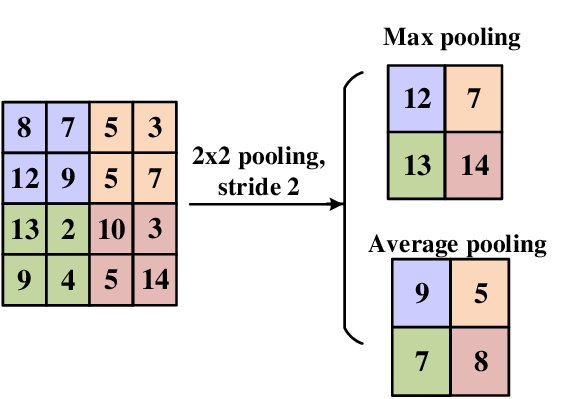

Zdroj obrázku [https://www.researchgate.net/publication/340812216_Deep_Neural_Networks_on_Chip_-_A_Survey/figures?lo=1](https://www.researchgate.net/publication/340812216_Deep_Neural_Networks_on_Chip_-_A_Survey/figures?lo=1)

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

V následující buňce jsou data opět načtena a vykreslena.

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


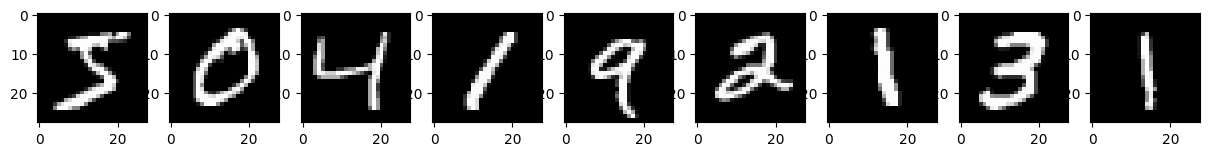

In [9]:
train_data, test_data = tf.keras.datasets.mnist.load_data()
X_tr,y_tr = train_data
X_test,y_test = test_data
print(f'{X_tr.shape}')
print(f'{y_tr.shape}')
print(f'{X_test.shape}')
print(f'{y_test.shape}')

fig, axs = plt.subplots(1, 9, figsize=(15, 3))
for index, ax in enumerate(axs):
  ax.imshow(X_tr[index],cmap='gray')
plt.show()

Poté dochází k jejich normalizaci na interval $<0,1>$, podobně jako v předchozím příkladu. Nyní ovšem pracujeme s obrázky, které mají jen jeden kanál, viz *INPUT_SHAPE*. Dále již jen převod na kategorické proměnné.

In [10]:
# Normalizace <0,255> -> <0,1>
X_tr = X_tr/255.0
X_test = X_test/255.0

INPUT_SHAPE = (28, 28, 1)
CATEGORIES = 10

# prevod na kategoricke promenne
y_tr_cat = tf.keras.utils.to_categorical(y_tr, CATEGORIES)  # preved na matici vystupu [1] -> [0,1,0,0,0]
y_test_cat = tf.keras.utils.to_categorical(y_test, CATEGORIES)


V další buňce je opět vytvořena funkce, která vrací model. Povšimněte si  předepisování parametrů konvoluční vrstvy, či použití tzv. *dropoutů* pro regularizaci. Tato konvoluční vrstva je pak pomocí *zploštění* (*flatten*) převedena na klasický *MLP* model.

Model je vytvořen a pak pomocí metody *fit()* naučen. Počet epoch je vzhledem k výpočetní náročnosti modelu nižší než v předchozím případě.

In [11]:
from tensorflow.keras import models, layers
def get_model():
  model = models.Sequential()
  model.add(layers.Input(shape=INPUT_SHAPE))
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(64, kernel_size=(5, 5), activation="relu"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(CATEGORIES, activation="softmax"))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


EPOCHS = 10
model = get_model()
history = model.fit(X_tr, y_tr_cat, epochs=EPOCHS, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 12s 5ms/step - loss: 0.2204 - accuracy: 0.9319 - val_loss: 0.0537 - val_accuracy: 0.9847
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0801 - accuracy: 0.9754 - val_loss: 0.0418 - val_accuracy: 0.9890
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0611 - accuracy: 0.9809 - val_loss: 0.0369 - val_accuracy: 0.9903
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0507 - accuracy: 0.9845 - val_loss: 0.0296 - val_accuracy: 0.9923
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0319 - val_accuracy: 0.9913
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.0308 - val_accuracy: 0.9920
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0353 - accuracy: 0.9885 - val_loss: 0.0268 - val_accuracy

Zhodnocení procesu učení pomocí *accuracy* a průběhu minimalizace ztrátové funkce je v kódu níže. Je vidět, že model dosahuje poměrně brzy vysoké přesnosti jak na trénovacích, tak i na validačních datech.

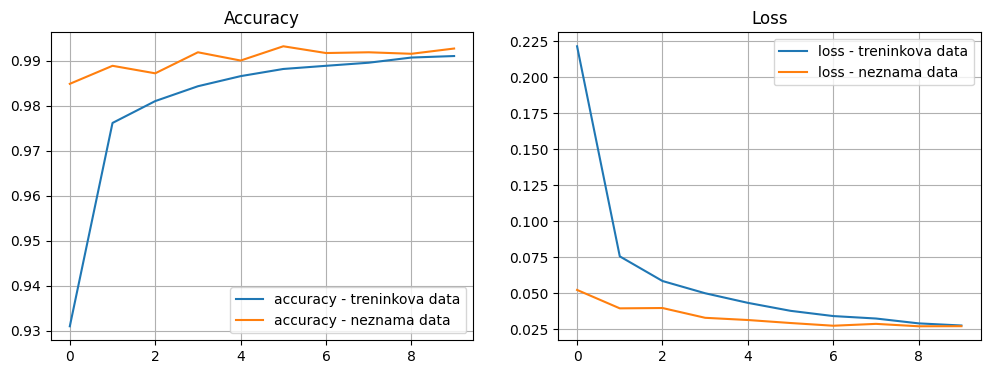

In [ ]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history['accuracy'], label='accuracy - treninkova data')
axis[0].plot(history.history['val_accuracy'], label='accuracy - neznama data')
axis[0].grid()
axis[0].set_title('Accuracy')
axis[0].legend()

axis[1].plot(history.history['loss'], label='loss - treninkova data')
axis[1].plot(history.history['val_loss'], label='loss - neznama data')
axis[1].grid()
axis[1].set_title('Loss')
axis[1].legend()

V poslední buňce je určena matice záměn a spočtena *accuracy* modelu na testovacích datech. Srovnejte s předchozím modelem, kde je nižší.

In [ ]:
from sklearn.metrics import confusion_matrix # matice
yhat = model.predict(X_test)
vysl = np.argmax(yhat,axis=1)
cm = confusion_matrix(y_test, vysl)
print(cm)

print("Ohodnoceni na testovacich datech")
results = model.evaluate(X_test, y_test_cat)
print("test loss, test acc:", results)

313/313 [==============================] - 1s 2ms/step
[[ 975    0    0    0    0    0    3    1    1    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [   1    0 1026    0    0    0    2    3    0    0]
 [   0    0    0 1006    0    2    0    1    1    0]
 [   0    0    0    0  979    0    0    0    2    1]
 [   0    0    0    4    0  884    1    1    0    2]
 [   0    1    0    0    2    4  949    0    2    0]
 [   0    1    3    1    0    1    0 1019    1    2]
 [   0    0    2    1    0    1    0    1  966    3]
 [   0    0    0    0    4    2    0    6    1  996]]
Ohodnoceni na testovacich datech
313/313 [==============================] - 1s 4ms/step - loss: 0.0214 - accuracy: 0.9932
test loss, test acc: [0.021364528685808182, 0.9932000041007996]


#### Úkoly pro samostatnou práci

Opět vyzkoušejte následující, ale pro model typu CNN:

1.      Vyzkoušejte různé modifikace modelu jako je počet
vrstev, typ aktivační funkce, velikost minibatche (v metodě fit). Upravte generující funkci modelu tak, aby stačilo pouze zadat příslušné hyperparametry modelu. Nalezněte nejlepší model, tedy model s nejvyšší accuracy na testovacích datech.
2.      Vyzkoušejte navrhnout model pro dataset [EMNIST](https://www.nist.gov/itl/products-and-services/emnist-dataset). Porovnejte s modelem bez konvoluční vrstvy, viz výše.
3.      Seznamte se s nástrojem pro tunning parametrů sítě, tzv. *hyperparametr tunning*, viz [zde](https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams).

### Regresní model

Jako poslední ukázku si ukážeme použití neuronových sítí pro úlohu regrese. Jako vstupní data budeme používat informace o počtu narozených dětí v minulosti a budeme předpovídat počet dětí v budoucnosti. Předpokládejme, že máme k dispozici dataset, který je součástí tohoto výukového matriálu a je uložen v adresáři *data* spolu s tímto výukovým materiálem na **Vašem Google disku**. Případně je ke stažení [zde](https://drive.google.com/file/d/1DXJYtrCG8HelVRRq7ZafHKgk6q3HVDNu/view?usp=sharing).

Nejprve si naimportujeme potřebné balíčky a připojíme Google Disk, viz [zde](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd).

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

drive.mount('/content/drive') # pripojeni google uloziste

Mounted at /content/drive


Nejprve data načteme z cloudového úložiště a v *dataframu* přejmenujeme sloupečky. Vidíme, že se jedná o časovou řadu, kde máme pro každý den časového období záznam o počtu narozených dětí. Konkrétně se jedná o počet narozených dětí v provincii Quebec od roku 1977 do roku 1990.

In [13]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/narozeni.csv", index_col=0, parse_dates=['Date'])  # nacteni dat
data.rename(columns={"Number of daily births in Quebec, Jan. 01, 1977 to Dec. 31, 1990": "Pocet"}, inplace=True)
data.head(14)


,Pocet
Date,
1977-01-01,208
1977-01-02,241
1977-01-03,274
1977-01-04,256
1977-01-05,294
1977-01-06,281
1977-01-07,251
1977-01-08,230
1977-01-09,240


####Průzkum dat

Když se na data podíváme, tak vidíme, že počet narozených dětí má jak trendovou složku, tak i periodickou, tedy v průběhu roku se rodí v různých měsících různý počet dětí. Na dalších buňkách vidíme, že dokonce je vliv i na úrovni dnů v týdnu.

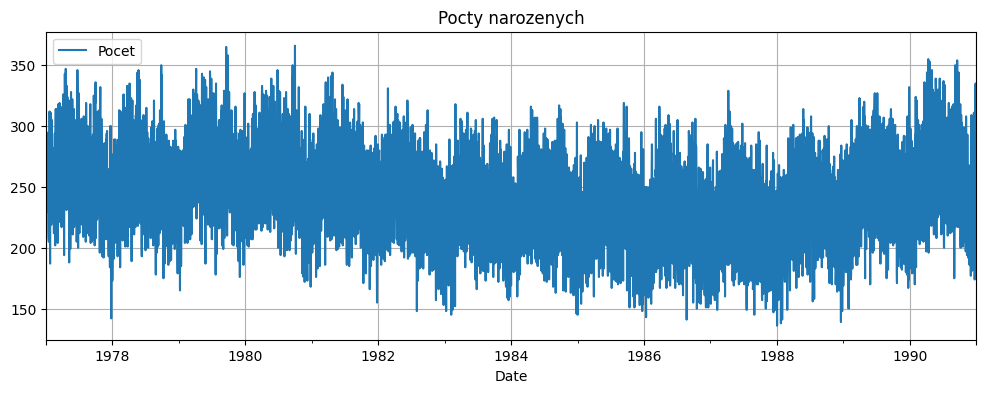

In [14]:
data.plot(title='Pocty narozenych')
plt.grid()

<Axes: >

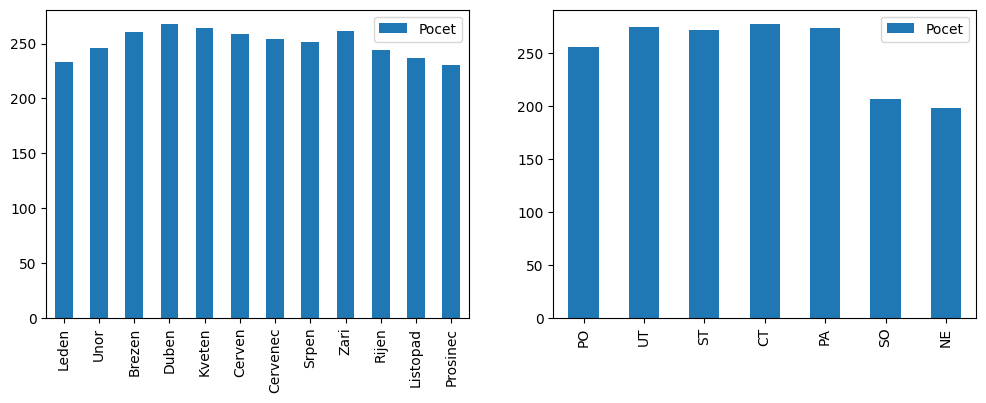

In [15]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)

mesicne = data.groupby(data.index.month).mean()  # seskup dle mesicu a vem prumer
mesicne.index = ['Leden', 'Unor', 'Brezen', 'Duben', 'Kveten', 'Cerven', 'Cervenec', 'Srpen', 'Zari', 'Rijen',
                     'Listopad', 'Prosinec']
mesicne.plot.bar(ax=axis[0])

tydne = data.groupby(data.index.weekday).mean()  # dle tydnu
tydne.index = ["PO", "UT", "ST", "CT", "PA", "SO", "NE"]
tydne.plot.bar(ax=axis[1])



#### Vytvoření modelu

V dalším budeme modelovat týdení periodicitu.
Vstupem modelu budou počty narozených za nějaké časové okno $w$ a výstupy modelu predikce na budoucí období, opět o délce $w$. Rozdělíme tedy dataset na takovéto vektory, kdy posun okna *step* volíme jedna. Tímto nám vznikne soubor vektorů, které složíme do matice. Podobně postupujeme pro výstupy sítě, kde ovšem používáme časový posun daný délkou okna.



In [16]:
X = []
y = []
w = 7 # delka okna
step = 1 # posun okna, default 1
narozeni = data.values.flatten()
for i in range(0, len(narozeni)-2*w, step):
  X.append(narozeni[i:i+w])
  y.append(narozeni[i+w:i+2*w])
X = np.array(X)
y = np.array(y)
print("Vstupy X:")
print(X[:4,:])
print("*"*20)
print("Pozadovane vystupy y:")
print(y[:4,:])

Vstupy X:
[[208 241 274 256 294 281 251]
 [241 274 256 294 281 251 230]
 [274 256 294 281 251 230 240]
 [256 294 281 251 230 240 249]]
********************
Pozadovane vystupy y:
[[230 240 249 272 270 281 295]
 [240 249 272 270 281 295 213]
 [249 272 270 281 295 213 205]
 [272 270 281 295 213 205 263]]


V následující buňce rozdělíme data na tréninková a testovací, bez promíchávání v poměru 70% trénovací a zbytek testovací. Šlo by samozřejmě použít některou z technik vícenásobné validace pro časové řady [zde](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html). A nakonec data normalizujeme.

In [17]:
# rozdeleni na treninkova a testovaci data a jejich normalizace
from sklearn.preprocessing import MinMaxScaler, StandardScaler
pomer = 0.7
index_tr = int(len(narozeni)/step*pomer)
X_tr, y_tr = X[:index_tr], y[:index_tr]
X_test, y_test = X[index_tr:],y[index_tr:]
# normalizace - standardizace dat
scaler =  StandardScaler() #MinMaxScaler() # muzete experimentovat vliv
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)
y_tr = scaler.transform(y_tr)
y_test = scaler.transform(y_test)

Na ukázce kódu níže dojde k naučení modelu. Všimněte si, že na výstupu je použita lineární aktivační funkce. Sledované metriky jsou *MSE* a *MAE*, jejich definice viz výše.

In [18]:
import tensorflow as tf
from tensorflow.keras import models, layers

def get_model():
  model = models.Sequential()
  model.add(layers.Dense(units = 32, input_shape = (w,) , activation = 'relu'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(units = 32, activation='relu'))
  model.add(layers.Dense(w, activation='linear'))
  model.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'mae'])
  return model


EPOCHS = 20
model = get_model()
history = model.fit(X_tr, y_tr, verbose = 1, epochs=EPOCHS, validation_split=0.1)


Epoch 1/20
101/101 [==============================] - 3s 9ms/step - loss: 0.6684 - mse: 0.6684 - mae: 0.6571 - val_loss: 0.5041 - val_mse: 0.5041 - val_mae: 0.5627
Epoch 2/20
101/101 [==============================] - 1s 6ms/step - loss: 0.3977 - mse: 0.3977 - mae: 0.4983 - val_loss: 0.3886 - val_mse: 0.3886 - val_mae: 0.4819
Epoch 3/20
101/101 [==============================] - 0s 5ms/step - loss: 0.3605 - mse: 0.3605 - mae: 0.4711 - val_loss: 0.3817 - val_mse: 0.3817 - val_mae: 0.4743
Epoch 4/20
101/101 [==============================] - 0s 4ms/step - loss: 0.3492 - mse: 0.3492 - mae: 0.4636 - val_loss: 0.3629 - val_mse: 0.3629 - val_mae: 0.4607
Epoch 5/20
101/101 [==============================] - 0s 4ms/step - loss: 0.3439 - mse: 0.3439 - mae: 0.4588 - val_loss: 0.3487 - val_mse: 0.3487 - val_mae: 0.4501
Epoch 6/20
101/101 [==============================] - 0s 4ms/step - loss: 0.3364 - mse: 0.3364 - mae: 0.4526 - val_loss: 0.3448 - val_mse: 0.3448 - val_mae: 0.4464
Epoch 7/20
101/1

Nyní vykreslíme sledované metriky a vidíme, že proces učení je uspokojivý. Obě křivky klesly a jsme v ploché oblasti, nebudeme tedy přidávat další epochy pro učení.

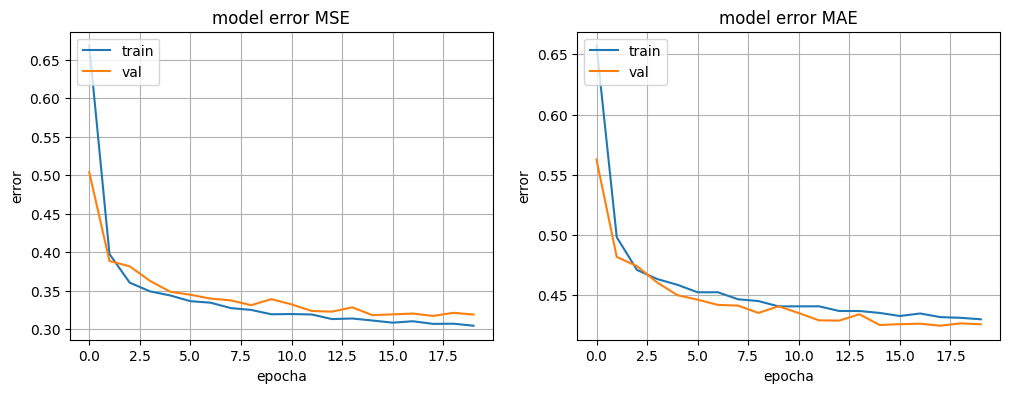

In [19]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history['mse'])
axis[0].plot(history.history['val_mse'])
axis[0].set_title('model error MSE')
axis[0].set_ylabel('error')
axis[0].set_xlabel('epocha')
axis[0].legend(['train', 'val'], loc='upper left')
axis[0].grid()

axis[1].plot(history.history['mae'])
axis[1].plot(history.history['val_mae'])
axis[1].set_title('model error MAE')
axis[1].set_ylabel('error')
axis[1].set_xlabel('epocha')
axis[1].legend(['train', 'val'], loc='upper left')
axis[1].grid()


V další ukázce porovnáme predikci s realitou. Spočteme predikce za celou testovací množinu a přeškálujeme je do původních hodnot. Obdobně přeškálujeme do původních hodnot testovací data, protože v kódu výše jsme si původní data přepsali škálovanými (!). Nakonec spočteme chybu v obou metrikách za všechny příklady. Toto je dobré pokud bychom chtěli porovnávat různé varianty modelu. Nakonec vykreslíme predikce na první týden testovacích dat. Je vidět, že model je relativně úspěšný.

48/48 [==============================] - 0s 2ms/step
Chyba v MSE na testovacich datech 517.6739427434393
Chyba v MAE na testovacich datech 17.58197101076743


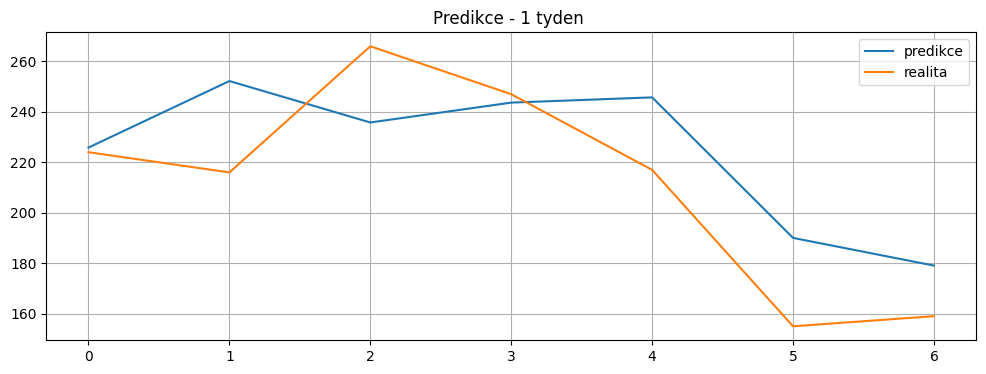

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_hat = model.predict(X_test) # spocti predikce za celou testovaci množinu
y_hat_inv = scaler.inverse_transform(y_hat) # preskaluj predikci do puvodnich hodnot
y_test_inv = scaler.inverse_transform(y_test)# preskaluj do puvodnich hodnot
# vytvoreni puvodni casove rady z maticovych dat - posun je jedna
MSE_test = mean_squared_error(y_hat_inv.flatten(),y_test_inv.flatten())
MAE_test = mean_absolute_error(y_hat_inv.flatten(),y_test_inv.flatten())
print(f"Chyba v MSE na testovacich datech {MSE_test}")
print(f"Chyba v MAE na testovacich datech {MAE_test}")
plt.plot(y_hat_inv[0,:], label = 'predikce')
plt.plot(y_test_inv[0,:], label = 'realita' )
plt.legend()
plt.grid()
plt.title(f"Predikce - 1 tyden ")
plt.show()

Na ukázce níže je ukázána tzv. *rolling* predikce, kdy nejprve spočteme predikci modelu pro jeden týden (délka okna $w=7$) a poté tuto predikci opět použijeme jako vstup do modelu. Toto odpovídá praktickému nasazení, kdy chceme predikovat více do budoucnosti, než je výstupní délka okna modelu. Výsledek je porovnán s testovacími daty.

1/1 [==============================] - 0s 22ms/step


Text(0.5, 1.0, 'Rolling predikce - 14 dnu')

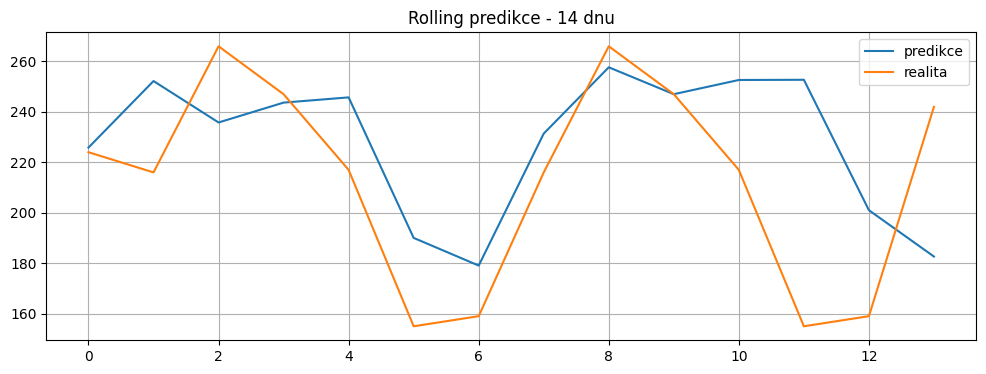

In [21]:
y_tp7 = model.predict(X_test[0,:].reshape(1,w)) # spocti jeden tyden
y_tp14 = model.predict(y_tp7) # pouzij predchozi vystup a sposti dalsi tyden
# transformace vysledku a jejich spojeni, abych to mohl vykreslit
y_14 = np.concatenate((scaler.inverse_transform(y_tp7).flatten(),scaler.inverse_transform(y_tp14).flatten()))
y_r = np.concatenate((scaler.inverse_transform(y_test[0,:].reshape(1,-1)).flatten(),(scaler.inverse_transform(y_test[1,:].reshape(1,-1)).flatten())))
plt.plot(y_14, label = 'predikce')
plt.plot(y_r, label = 'realita')
plt.legend()
plt.grid()
plt.title("Rolling predikce - 14 dnu")

#### Úkoly pro samostatnou práci

1.      Vyzkoušejte různé modifikace modelu jako je počet
vrstev, typ aktivační funkce, velikost minibatche (v metodě fit). Upravte generující funkci modelu tak, aby stačilo pouze zadat příslušné hyperparametry modelu. Nalezněte nejlepší model v metrice MSE.
2.      Pokuste se navrhnout model pro predikci "trendu". Trend vyrobíte tak, že data zprůměrujete za nějaké časové období, např. týden, měsíc, či rok, viz ukázka níže. Tady když data zprůměrujete po týdnech, tak je tam pořád sezónní složka, která má roční periodu, ale pokud bude délka okna rok, tak dojde k vyhlazení. Vyzkoušejte.

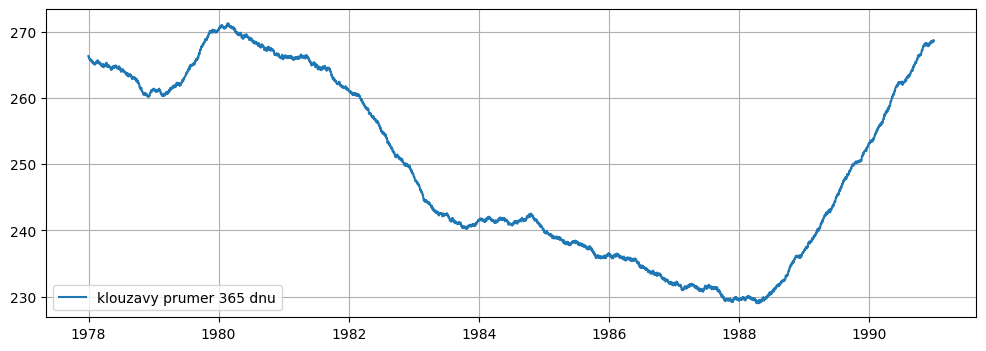

In [22]:
w=365
vyhlazeno_prumer = data.rolling(window=w).mean()
plt.plot(vyhlazeno_prumer, label = f'klouzavy prumer {w} dnu')
plt.legend()
plt.grid()


# Literatura:

1) Blog autora knihy Python Machine Learning, 3rd Edition:

RASCHKA, Sebastian a Vahid MIRJALILI. Python machine learning: machine learning and deep learning with Python, scikit-learn, and TensorFlow. Birmingham: Pack pub- lishing, 2017. ISBN 978-1-78712-593-3.

2) Principy neuronových sítí jsou popsány do hloubky [zde](https://www.deeplearningbook.org/). Jedná se o web ke knize:

Ian Goodfellow and Yoshua Bengio and Aaron Courville, Deep Learning, MIT Press, 2016,ISBN 978-0262035613.

3) Další praktické informace nalezne čtenář(ka) v tutoriálech pro Tensorflow, např. [zde](https://www.tensorflow.org/tutorials).